## Objective:
    The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.


# Tasks:
### 1. Data Preparation:
      Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import f_classif ,chi2
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler,MinMaxScaler

In [2]:
df=pd.read_csv('heart_disease.csv')

In [3]:
df.shape

(908, 13)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


### 2. Exploratory Data Analysis (EDA):
    Perform exploratory data analysis to understand the structure of the dataset.
    Check for missing values, outliers, and inconsistencies in the data.
    Visualize the distribution of features, including histograms, box plots, and correlation matrices.

In [5]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:
df.fillna({"oldpeak":df['oldpeak'].mean()},inplace=True)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()
df.shape

(907, 13)

In [11]:
target=df[['num']]
df.drop(columns="num",inplace=True)

In [12]:
cat_col=df.select_dtypes(['object','category']).columns
cat_col

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [13]:
num_col=df.select_dtypes(['int','float']).columns
num_col

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak'], dtype='object')

In [14]:
cat=df[cat_col].copy()
num=df[num_col].copy()

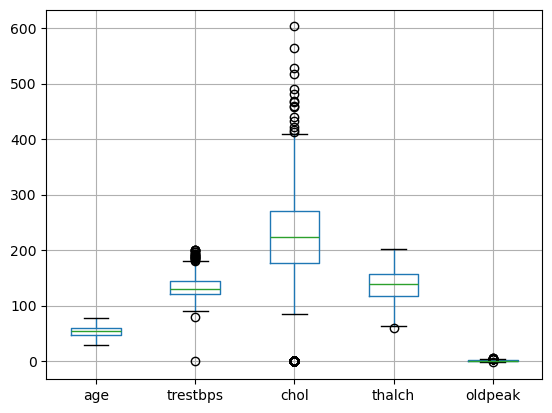

In [15]:
num.boxplot()
plt.show()

In [16]:
def outlier_capping(num,column):
    Q1=num[column].quantile(0.25)
    Q3=num[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_Xstream=Q1-1.5*IQR
    Upper_Xstream=Q3+1.5*IQR
    num[column]=num[column].apply(lambda x:Lower_Xstream if x<Lower_Xstream else Upper_Xstream if x > Upper_Xstream else x)
for col in num.select_dtypes(['int','float']).columns:
    outlier_capping(num,col)

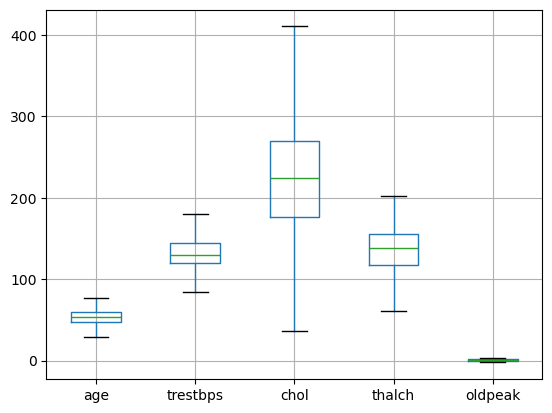

In [17]:
num.boxplot()
plt.show()

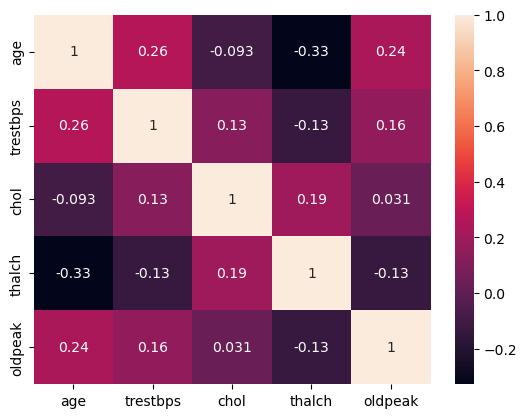

In [18]:
corr=num.corr()
sns.heatmap(corr,annot=True)
plt.show()

### 3. Feature Engineering:
     If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [19]:
cat.head()

,sex,cp,restecg,exang,slope,thal
0,Male,typical angina,lv hypertrophy,FALSE,downsloping,fixed defect
1,Male,atypical angina,normal,FALSE,flat,fixed defect
2,Male,asymptomatic,normal,FALSE,flat,fixed defect
3,Male,typical angina,lv hypertrophy,FALSE,flat,fixed defect
4,Male,asymptomatic,normal,TRUE,flat,fixed defect


In [20]:
Ord=OrdinalEncoder()
df1=pd.DataFrame(Ord.fit_transform(cat),columns=cat.columns)
df1

,sex,cp,restecg,exang,slope,thal
0,1.0,3.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,3.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...
902,1.0,0.0,1.0,0.0,2.0,1.0
903,1.0,0.0,2.0,1.0,1.0,2.0
904,1.0,2.0,0.0,1.0,0.0,1.0
905,1.0,2.0,2.0,2.0,0.0,2.0


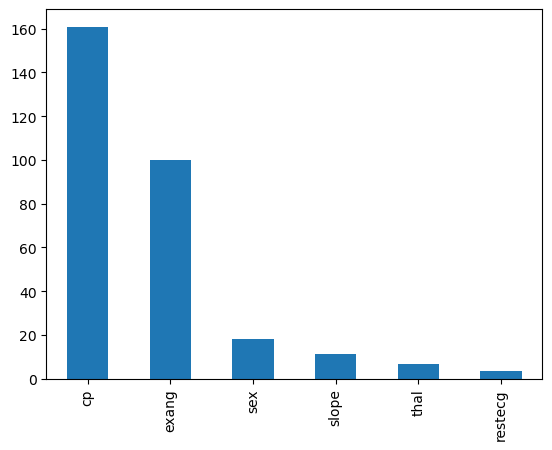

In [21]:
chi=chi2(df1,target)
pd.Series(chi[0],index=df1.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [39]:
df1.drop(columns=['thal','restecg'],inplace=True)
df1

,sex,cp,exang,slope
0,1.0,3.0,0.0,0.0
1,1.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0
3,1.0,3.0,0.0,1.0
4,1.0,0.0,1.0,1.0
...,...,...,...,...
902,1.0,0.0,0.0,2.0
903,1.0,0.0,1.0,1.0
904,1.0,2.0,1.0,0.0
905,1.0,2.0,2.0,0.0


In [40]:
num

,age,chol,thalch,oldpeak
0,63,233.00,150.0,2.300000
1,41,203.00,132.0,0.000000
2,57,192.00,148.0,0.400000
3,52,186.00,190.0,0.000000
4,57,201.00,126.0,1.500000
...,...,...,...,...
903,53,36.25,120.0,1.500000
904,62,170.00,120.0,3.000000
905,56,36.25,123.0,2.500000
906,56,208.00,105.0,0.891253


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


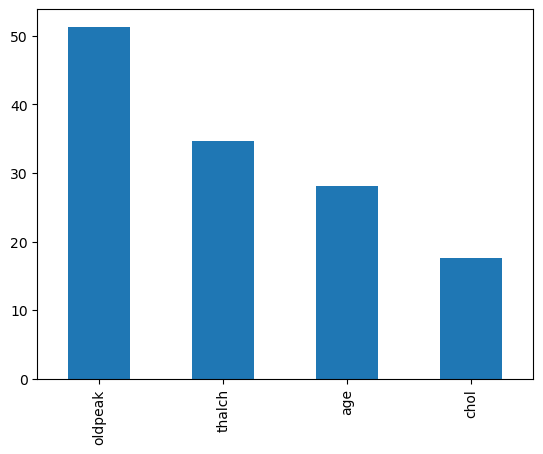

In [41]:
fclas=f_classif(num,target)
pd.Series(fclas[0],index=num.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [42]:
num.drop(columns="trestbps",inplace=True)
num

,age,chol,thalch,oldpeak
0,63,233.00,150.0,2.300000
1,41,203.00,132.0,0.000000
2,57,192.00,148.0,0.400000
3,52,186.00,190.0,0.000000
4,57,201.00,126.0,1.500000
...,...,...,...,...
903,53,36.25,120.0,1.500000
904,62,170.00,120.0,3.000000
905,56,36.25,123.0,2.500000
906,56,208.00,105.0,0.891253


In [49]:
std_sca=StandardScaler()
df2=pd.DataFrame(std_sca.fit_transform(num),columns=num.columns)
df2
num.shape

(907, 4)

In [50]:
df1.shape

(907, 4)

In [70]:
features=pd.concat([df1,num],axis=1)
features

,sex,cp,exang,slope,age,chol,thalch,oldpeak
0,1.0,3.0,0.0,0.0,63.0,233.00,150.0,2.300000
1,1.0,1.0,0.0,1.0,41.0,203.00,132.0,0.000000
2,1.0,0.0,0.0,1.0,57.0,192.00,148.0,0.400000
3,1.0,3.0,0.0,1.0,52.0,186.00,190.0,0.000000
4,1.0,0.0,1.0,1.0,57.0,201.00,126.0,1.500000
...,...,...,...,...,...,...,...,...
903,1.0,0.0,1.0,1.0,53.0,36.25,120.0,1.500000
904,1.0,2.0,1.0,0.0,62.0,170.00,120.0,3.000000
905,1.0,2.0,2.0,0.0,56.0,36.25,123.0,2.500000
906,1.0,0.0,0.0,1.0,56.0,208.00,105.0,0.891253


In [71]:
features.drop(index=907,inplace=True)
features.shape

(907, 8)

In [72]:
target.shape

(907, 1)

## 4. Decision Tree Classification:
    Split the dataset into training and testing sets (e.g., using an 80-20 split).
    Implement a Decision Tree Classification model using a library like scikit-learn.
    Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics 
    (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [73]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(725, 8)
(725, 1)
(182, 8)
(182, 1)


In [86]:
desc=DecisionTreeClassifier(criterion='entropy',max_depth=4,splitter='best')
desc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [101]:
y_pred=desc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='weighted'))
print(f1_score(y_test,y_pred,average='weighted'))

0.6581387362901
0.4810695377496996
0.49163412265774475


### 5. Hyperparameter Tuning:
      Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [88]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,5)}
grid_search=GridSearchCV(desc,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

## 6. Model Evaluation and Analysis:
    Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
    Visualize the decision tree structure to understand the rules learned by the model and identify important features


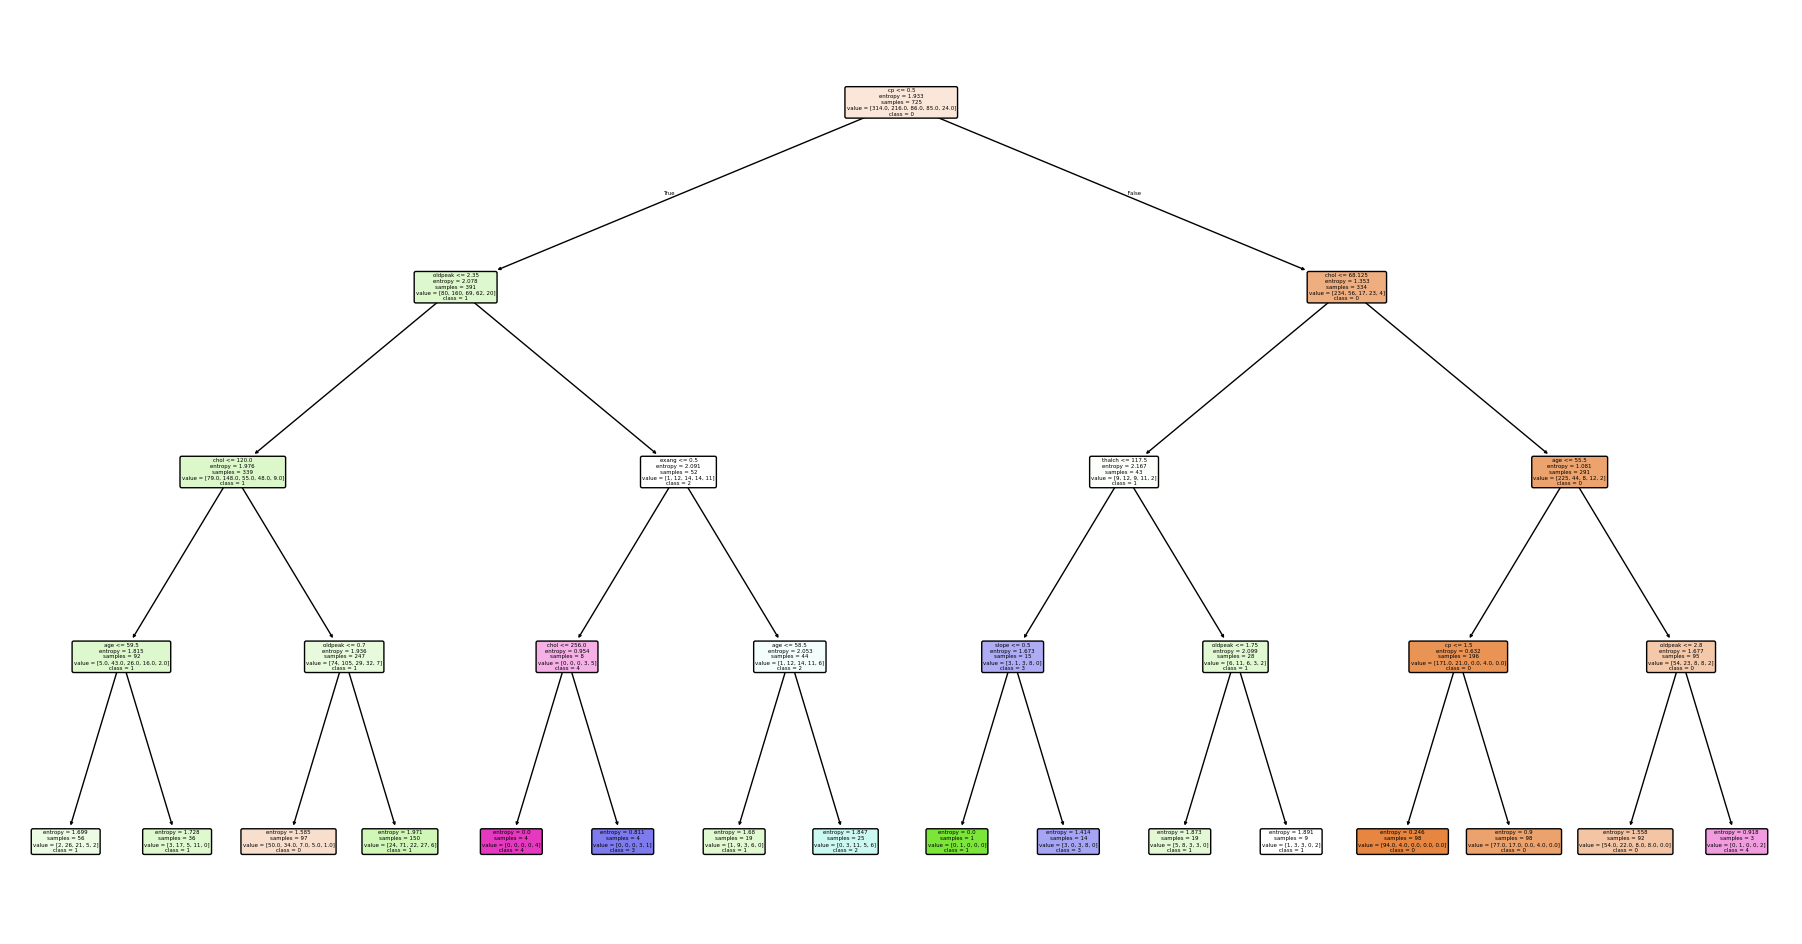

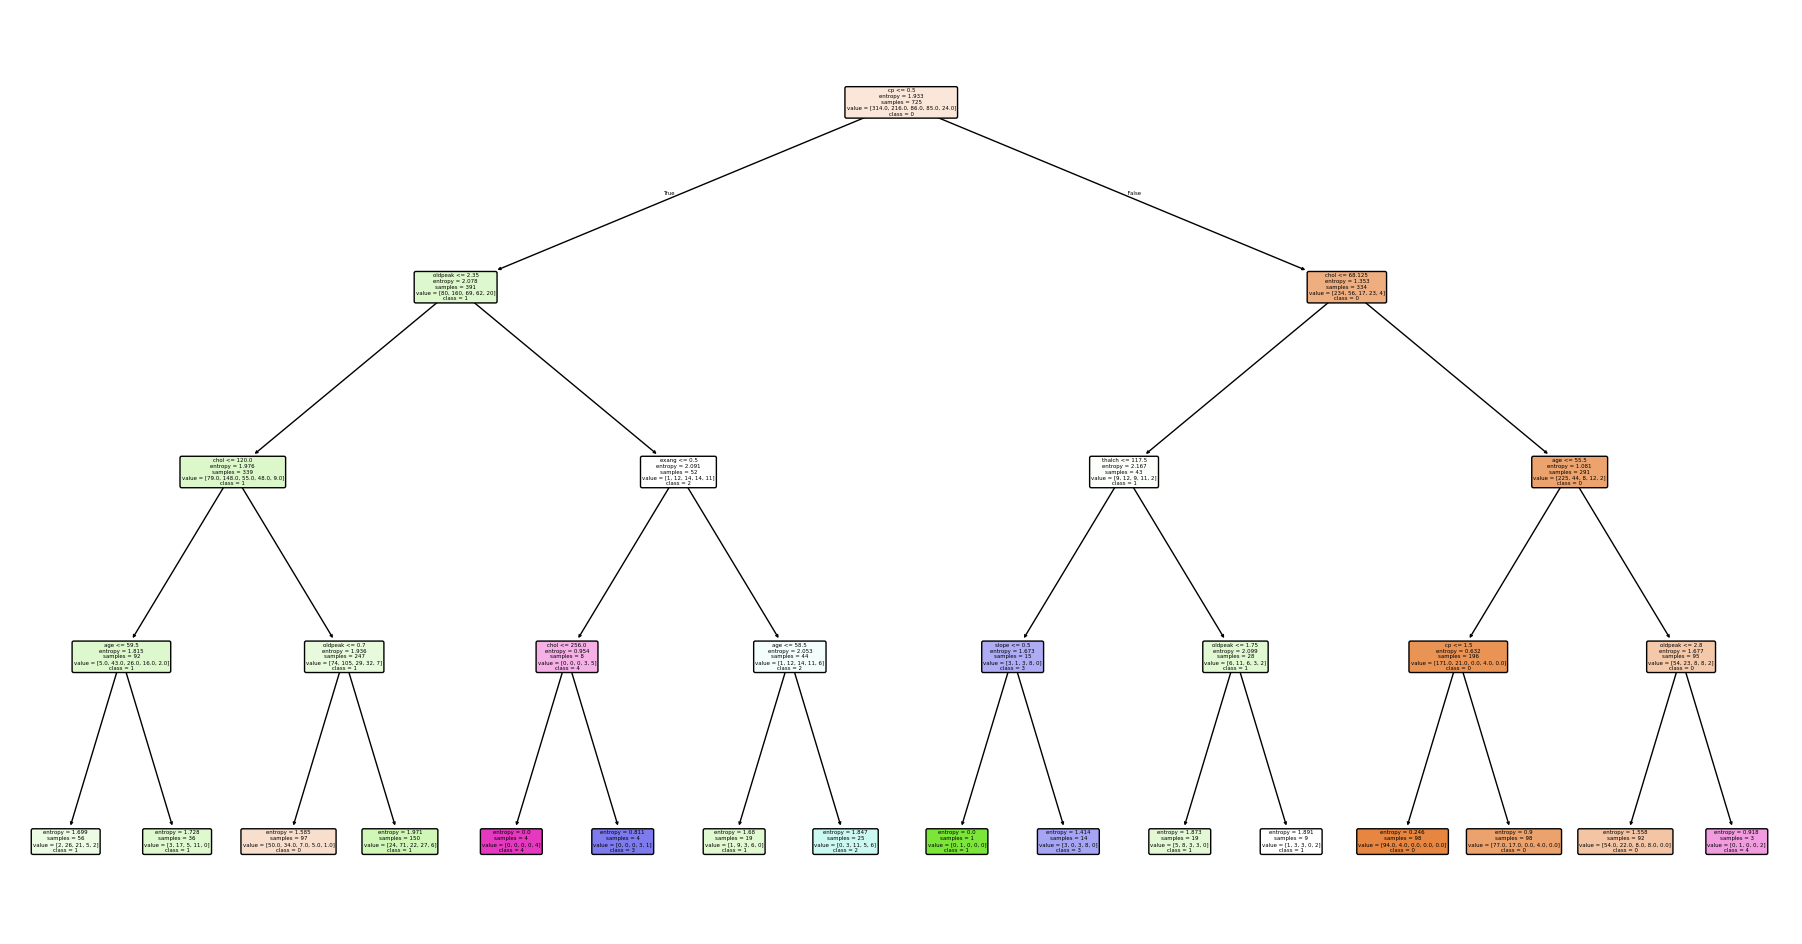

In [100]:
plt.figure(figsize=(23,12))
plot_tree(
    desc,
    filled=True,
    feature_names=list(features),
    class_names=[str(c) for c in target.num.unique()],
    rounded=True
)
plt.show()

## Interview Questions:
     1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
     
            The common hyperparameters of decision tree are criterion , max_dept and splitter.There are two types of criterion available that is entropy and gini.Entropy is more accurate while gini is faster.max_depth defines the number of depth upto which the tree should build.Splitter there are two types one is best another is random.If we use best the node is selected based on information_gain if we use random it will select any one as decision node.
            
     2. What is the difference between the Label encoding and One-hot encoding?
     
              Label encoder enode the data within the dataframe column.But one-hot encodeing spilit the data into number of columns as the unique values and will fill 1 if it has the value else 0.
